In [61]:
import pandas as pd;
import numpy as np;
import sklearn
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

In [62]:
train_df = pd.read_csv("datasets/Walmart.csv")
train_df.head(10)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [63]:
train_df.keys()

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429 entries, 0 to 6428
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6429 non-null   int64  
 1   Date          6429 non-null   object 
 2   Weekly_Sales  6429 non-null   float64
 3   Holiday_Flag  6429 non-null   int64  
 4   Temperature   6429 non-null   float64
 5   Fuel_Price    6429 non-null   float64
 6   CPI           6429 non-null   float64
 7   Unemployment  6429 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 401.9+ KB


In [65]:
train_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Store,6429.0,2.299347e+01,12.977361,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6429.0,1.047142e+06,564405.549028,209986.250,553714.870,960945.430000,1.419912e+06,3.818686e+06
Holiday_Flag,6429.0,6.999533e-02,0.255159,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6429.0,6.066446e+01,18.452479,-2.060,47.420,62.680000,7.495000e+01,1.001400e+02
Fuel_Price,6429.0,3.358237e+00,0.459048,2.472,2.932,3.445000,3.735000e+00,4.468000e+00
CPI,6429.0,1.715684e+02,39.356282,126.064,131.735,182.616521,2.127397e+02,2.272328e+02
Unemployment,6429.0,8.000252e+00,1.875912,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [66]:
# Check for missing stuff
df = train_df
print(df.isnull().sum())

imputer = SimpleImputer(strategy="median")

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


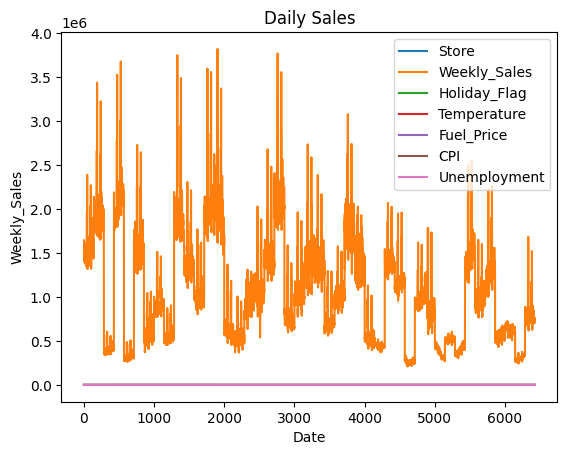

In [69]:
# DATES FEATURES
dataset = train_df;
def date_features(df):
    # Date Features
    date = [str(x).strip().split('-') for x in dataset['Date']]
    df['Date'] = pd.to_datetime(dataset['Date'], format="%d-%m-%Y")
    df['year'] = [float(x[2]) for x in date]
    df['month'] = [float(x[1]) for x in date]
    df['day'] = [float(x[0]) for x in date]
    print(date)
    
    # Additionnal Data Features
    # df['day^year'] = np.log((np.log(dataset['dayofyear'] + 1)) ** (dataset['year'] - 2000))
    
 
    
    return df

In [70]:

# Dates Features for Train, Test
train_df = date_features(train_df)
# Drop date
train_df.drop('Date', axis=1, inplace=True)

[['05', '02', '2010'], ['12', '02', '2010'], ['19', '02', '2010'], ['26', '02', '2010'], ['05', '03', '2010'], ['12', '03', '2010'], ['19', '03', '2010'], ['26', '03', '2010'], ['02', '04', '2010'], ['09', '04', '2010'], ['16', '04', '2010'], ['23', '04', '2010'], ['30', '04', '2010'], ['07', '05', '2010'], ['14', '05', '2010'], ['21', '05', '2010'], ['28', '05', '2010'], ['04', '06', '2010'], ['11', '06', '2010'], ['18', '06', '2010'], ['25', '06', '2010'], ['02', '07', '2010'], ['09', '07', '2010'], ['16', '07', '2010'], ['23', '07', '2010'], ['30', '07', '2010'], ['06', '08', '2010'], ['13', '08', '2010'], ['20', '08', '2010'], ['27', '08', '2010'], ['03', '09', '2010'], ['10', '09', '2010'], ['17', '09', '2010'], ['24', '09', '2010'], ['01', '10', '2010'], ['08', '10', '2010'], ['15', '10', '2010'], ['22', '10', '2010'], ['29', '10', '2010'], ['05', '11', '2010'], ['12', '11', '2010'], ['19', '11', '2010'], ['26', '11', '2010'], ['03', '12', '2010'], ['10', '12', '2010'], ['17', '1

In [50]:
train_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010.0,2.0,5.0
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010.0,2.0,12.0
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010.0,2.0,19.0
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010.0,2.0,26.0
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012.0,9.0,28.0
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012.0,10.0,5.0
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012.0,10.0,12.0
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012.0,10.0,19.0


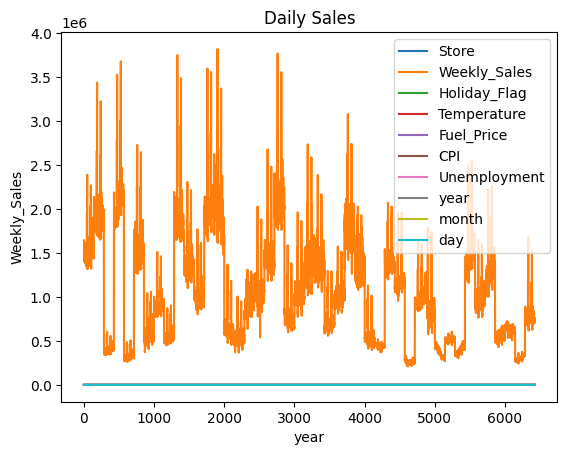

In [73]:
train_df.plot()
plt.xlabel('year')
    plt.ylabel('Weekly_Sales')
plt.title('Daily Sales')
plt.show()

In [52]:
# Daily Average, Monthly Average for train
train_df['monthly_avg'] = train_df.groupby(['Store','month'])['Weekly_Sales'].transform('mean')
train_df.dropna()
train_df

# Average sales for Month = m per Item,Store
monthly_avg = train_df.groupby(['Store','month'])['Weekly_Sales'].mean().reset_index()
monthly_avg


,Store,month,Weekly_Sales
0,1,1.0,1.400468e+06
1,1,2.0,1.625442e+06
2,1,3.0,1.567744e+06
3,1,4.0,1.544510e+06
4,1,5.0,1.542111e+06
...,...,...,...
535,45,8.0,7.361081e+05
536,45,9.0,7.237619e+05
537,45,10.0,7.376087e+05
538,45,11.0,8.778102e+05


In [39]:
import plotly.express as px

fig = px.imshow(train_df.corr(),text_auto=True)
fig.show()



In [53]:
train_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,monthly_avg
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010.0,2.0,5.0,1.625442e+06
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010.0,2.0,12.0,1.625442e+06
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010.0,2.0,19.0,1.625442e+06
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010.0,2.0,26.0,1.625442e+06
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010.0,3.0,5.0,1.567744e+06
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012.0,9.0,28.0,7.237619e+05
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012.0,10.0,5.0,7.376087e+05
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012.0,10.0,12.0,7.376087e+05
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012.0,10.0,19.0,7.376087e+05


In [57]:
fig = px.line(train_df.head(100), x="year", y="monthly_avg", title='Avg sales in Month')
fig.show()

In [ ]:
X_train = train_df.drop("Weekly_Sales",axis = 1)
Y_train = train_df["Weekly_Sales"]
Y_train

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [ ]:
# Clean features highly correlated to each others
for df in [train, test]:
    df.drop(['dayofyear', 
                  'weekofyear',
                  'daily_avg',
                  'day',
                  'month',
                  'item',
                  'store',],
                 axis=1, 
                 inplace=True)